<a href="https://colab.research.google.com/github/mhtefe/deepLearning/blob/master/torchNotes/2_2_image_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import imageio

img_arr = imageio.imread('/content/drive/My Drive/MachineLearning/examples/pytorch/data/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

In [ ]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [ ]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

(256, 256, 4)
torch.Size([4, 256, 256])
(256, 256, 4)
torch.Size([4, 256, 256])
(256, 256, 4)
torch.Size([4, 256, 256])


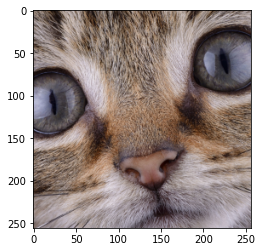

In [ ]:
import os

data_dir = '/content/drive/My Drive/MachineLearning/examples/pytorch/data/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    print(img_arr.shape)
    plt.imshow(img_arr)
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    print(img_t.shape)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [ ]:
batch.shape

torch.Size([3, 3, 256, 256])

In [ ]:
batch = batch.float()
batch /= 255.0

In [ ]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std